In [1]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#For interactive plots
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
livestock = pd.read_csv('data/Production_Livestock_E_All_Data_(Normalized).csv', parse_dates=[7], index_col=7,  encoding='iso-8859-1')
beehives = livestock.loc[livestock['Item'] == 'Beehives', ['Area', 'Value']]
beehives.columns = ['Country', 'Value']
beehives.head()

In [ ]:
def percentage_change(df, countries, startYear, endYear):
    df = df.loc[df.Country.isin(countries)]
    
    old = np.array(df.loc[df.index == startYear, 'Value'])
    new = np.array(df.loc[df.index == endYear, 'Value'])
    res = pd.DataFrame((new - old) / old) * 100
    res.index = df.Country.unique()
    res.columns = ['Value']
    
    fig = plt.figure(figsize=(15, 8))
    plt.bar(x = res.index, height = res.Value, color=(res['Value'] > 0).map({True: 'b', False: 'r'}))
    plt.axhline(y = 0,linewidth = 1, color = 'k');

In [ ]:
continents = ['Africa','Americas', 'Asia',  'Europe', 'Oceania']
countries = ['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia','Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium','Belgium-Luxembourg', 'Belize', 'Bolivia (Plurinational State of)','Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burundi','Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile','China', 'Colombia', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba','Cyprus', 'Czechia', 'Czechoslovakia', 'Dominican Republic','Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia','Ethiopia PDR', 'Fiji', 'Finland', 'France', 'French Polynesia','Georgia', 'Germany', 'Greece', 'Greenland', 'Guadeloupe', 'Guam','Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti','Honduras', 'Hungary', 'India', 'Iran (Islamic Republic of)','Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya','Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Liechtenstein','Lithuania', 'Luxembourg', 'Madagascar', 'Mali', 'Martinique','Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique','Myanmar', 'Netherlands', 'New Caledonia', 'New Zealand','Nigeria', 'Niue', 'Occupied Palestinian Territory', 'Oman','Pakistan', 'Paraguay', 'Poland', 'Portugal', 'Puerto Rico','Republic of Korea', 'Republic of Moldova', 'Romania','Russian Federation', 'Rwanda', 'Samoa', 'Senegal', 'Serbia','Serbia and Montenegro', 'Slovakia', 'Slovenia', 'South Africa','Spain', 'Sudan', 'Sudan (former)', 'Sweden', 'Switzerland','Syrian Arab Republic', 'Tajikistan','The former Yugoslav Republic of Macedonia', 'Timor-Leste','Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tuvalu','Uganda', 'Ukraine', 'United Kingdom','United Republic of Tanzania', 'United States of America','Uruguay', 'USSR', 'Uzbekistan','Venezuela (Bolivarian Republic of)', 'Viet Nam','Wallis and Futuna Islands', 'Yemen', 'Yugoslav SFR', 'Zambia']
selected_countries = ['Austria', 'Bulgaria', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Poland', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'Canada', 'Mexico', 'United States of America']

In [ ]:
percentage_change(beehives, continents, '1961', '2000')

In [ ]:
percentage_change(beehives, selected_countries, '2010', '2017')

# An interactive plot of percentage changes during the years

In [ ]:
beehives_selected = beehives.loc[beehives.Country.isin(selected_countries)]

@interact(Starting_Year=(1961, 2016, 1), End_Year=(1962, 2017, 1))
def show_beehives_for_country(Starting_Year=1961, End_Year=2017):
    
    old = np.array(beehives_selected.loc[beehives_selected.index == str(Starting_Year), 'Value'])
    new = np.array(beehives_selected.loc[beehives_selected.index == str(End_Year), 'Value'])
    
    res = pd.DataFrame((new - old) / old) * 100
    res.index = beehives_selected.Country.unique()
    res.columns = ['Value']
    
    fig = plt.figure(figsize=(15, 8))
    plt.axis([0, len(selected_countries), -150, 500])
    plt.bar(x = res.index, height = res.Value, color=(res['Value'] > 0).map({True: 'b', False: 'r'}))
    plt.xticks(rotation=45)
    plt.axhline(y = 0,linewidth = 1, color = 'k');

Here we have a plot of percentage changes for some selected countries during the years. You can use the sliders to change years between which the percentage change is computed.

# Fuck yea America

Used data from https://www.nass.usda.gov/Surveys/Guide_to_NASS_Surveys/Bee_and_Honey/

In [132]:
import csv

header = [['State', 'Colonies', 'Maximum', 'Lost', 'Percent lost', 'Added', 'Renovated', 'Percent renovated'],
            ['State', 'Mites', 'Parasites', 'Diseases', 'Pesticides', 'Other', 'Unknown']]

def create_dataframe(path, index):
    
    title = []
    data = []
    
    with open(path, encoding="utf8", errors='ignore') as input_file:
        reader = csv.reader(input_file)
        
        for cnt, row in enumerate(reader):
            
            if row[1] == 't':
                title.append(row)
            
#             if row[1] == 'h':
#                 header.append(row[2:])
                
            if row[1] == 'd':
                data.append(row[2:])

    date = title[1][-1].split('-')[-1]
    
    df = pd.DataFrame(data)
    df.columns = header[index]
    df['Date'] = pd.to_datetime(date)
    return df[df.State != '']

In [133]:
folder = 'data/Bees/'

files = ['BeeColonies-05-12-2016/hcny_p01_t005.csv', 'BeeColonies-05-12-2016/hcny_p02_t001.csv',
        'BeeColonies-05-12-2016/hcny_p03_t007.csv', 'BeeColonies-05-12-2016/hcny_p04_t008.csv',
         
        'BeeColonies-08-01-2017/hcny_p04_t005.csv', 'BeeColonies-08-01-2017/hcny_p05_t001.csv',
        'BeeColonies-08-01-2017/hcny_p06_t007.csv', 'BeeColonies-08-01-2017/hcny_p07_t008.csv',
         
        'BeeColonies-08-01-2018/hcny_p04_t005.csv', 'BeeColonies-08-01-2018/hcny_p05_t001.csv',
        'BeeColonies-08-01-2018/hcny_p06_t007.csv', 'BeeColonies-08-01-2018/hcny_p07_t008.csv',
         
        'BeeColonies-08-01-2019/hcny_p03_t005.csv', 'BeeColonies-08-01-2019/hcny_p04_t001.csv',
        'BeeColonies-08-01-2019/hcny_p05_t007.csv', 'BeeColonies-08-01-2019/hcny_p06_t008.csv',
        'BeeColonies-08-01-2019/hcny_p07_t011.csv']

files2 = ['BeeColonies-05-12-2016/hcny_p06_t002.csv', 'BeeColonies-05-12-2016/hcny_p07_t013.csv',
        'BeeColonies-05-12-2016/hcny_p08_t009.csv', 'BeeColonies-05-12-2016/hcny_p09_t010.csv',
         
        'BeeColonies-08-01-2017/hcny_p10_t002.csv', 'BeeColonies-08-01-2017/hcny_p11_t013.csv',
        'BeeColonies-08-01-2017/hcny_p12_t009.csv', 'BeeColonies-08-01-2017/hcny_p13_t010.csv',
         
        'BeeColonies-08-01-2018/hcny_p10_t002.csv', 'BeeColonies-08-01-2018/hcny_p11_t013.csv',
        'BeeColonies-08-01-2018/hcny_p12_t009.csv', 'BeeColonies-08-01-2018/hcny_p13_t010.csv',
         
        'BeeColonies-08-01-2019/hcny_p08_t002.csv', 'BeeColonies-08-01-2019/hcny_p09_t013.csv',
        'BeeColonies-08-01-2019/hcny_p10_t009.csv', 'BeeColonies-08-01-2019/hcny_p11_t010.csv',
        'BeeColonies-08-01-2019/hcny_p12_t012.csv']

In [134]:
colonies = pd.concat([create_dataframe(folder + file, index=0) for file in files], axis=0)
colonies = colonies.reset_index(drop=True)
colonies.replace(['(X)', '(Z)', '-'], 0, inplace=True)
colonies.iloc[:, 1:-1] = colonies.iloc[:, 1:-1].astype(int)

In [135]:
colonies

,State,Colonies,Maximum,Lost,Percent lost,Added,Renovated,Percent renovated,Date
0,Alabama,7000,7000,1800,26,2800,250,4,2015-03-01
1,Arizona,35000,35000,4600,13,3400,2100,6,2015-03-01
2,Arkansas,13000,14000,1500,11,1200,90,1,2015-03-01
3,California,1440000,1690000,255000,15,250000,124000,7,2015-03-01
4,Colorado,3500,12500,1500,12,200,140,1,2015-03-01
...,...,...,...,...,...,...,...,...,...
794,West Virginia,5000,7000,1300,19,20,60,1,2019-03-01
795,Wisconsin,16500,17000,3700,22,580,100,1,2019-03-01
796,Wyoming,6500,9500,250,3,0,0,0,2019-03-01
797,Other States 5/,6070,6070,590,10,70,30,0,2019-03-01


In [136]:
colonies.loc[colonies.State == 'United States']

,State,Colonies,Maximum,Lost,Percent lost,Added,Renovated,Percent renovated,Date
46,United States,2824610,0,500020,18,546980,270530,10,2015-03-01
93,United States,2849500,0,352860,12,661860,692850,24,2015-06-01
140,United States,3132880,0,457100,15,172990,303070,10,2015-09-01
187,United States,2874760,0,412380,14,117150,158790,6,2015-12-01
234,United States,2619940,0,416100,16,571880,245060,9,2016-03-01
281,United States,2801470,0,329820,12,736920,561160,20,2016-06-01
328,United States,3181180,0,397290,12,217320,282130,9,2016-09-01
375,United States,3032060,0,502350,17,124660,60390,2,2016-12-01
422,United States,2641090,0,398650,15,478240,241210,9,2017-03-01
469,United States,2694150,0,285590,11,613360,762550,28,2017-06-01


The next plot shows the number of lost colonies of bees in the US during the period 2015-2019

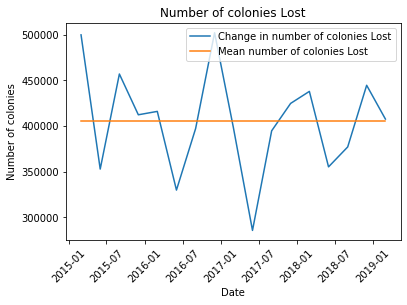

In [137]:
column = 'Lost'
state = colonies.loc[colonies.State == 'United States', ['Date', column]]
plt.plot(state.Date, state[column], label=f'Change in number of colonies {column}')
plt.plot(state.Date, [state[column].mean()] * len(state.Date), label=f'Mean number of colonies {column}')
plt.xticks(rotation=45)
plt.title(f'Number of colonies {column}')
plt.xlabel('Date')
plt.ylabel('Number of colonies')
plt.legend();

In [138]:
disorder = pd.concat([create_dataframe(folder + file, index=1) for file in files2], axis=0)
disorder = disorder.reset_index(drop=True)
disorder.replace(['(X)', '(Z)', '-'], 0, inplace=True)
disorder.iloc[:, 1:-1] = disorder.iloc[:, 1:-1].astype(float)

In [139]:
disorder.loc[disorder.State == 'United States']

,State,Mites,Parasites,Diseases,Pesticides,Other,Unknown,Date
46,United States,25.2,8.6,3.1,7.4,6.9,4.3,2015-03-01
93,United States,43.4,19.5,4.9,16.6,11.6,3.5,2015-06-01
140,United States,41.2,17.6,8.0,15.2,8.8,4.8,2015-09-01
187,United States,37.0,11.4,5.2,9.5,7.3,6.9,2015-12-01
234,United States,34.6,12.6,6.2,10.9,6.9,5.4,2016-03-01
281,United States,53.4,16.3,9.5,12.4,12.3,4.1,2016-06-01
328,United States,46.1,15.6,6.7,15.1,9.3,4.5,2016-09-01
375,United States,46.6,16.9,8.3,9.4,10.1,6.4,2016-12-01
422,United States,42.2,15.5,7.0,8.9,7.2,7.4,2017-03-01
469,United States,40.9,10.9,4.6,12.3,7.0,4.9,2017-06-01


The next plot shows the the percentage of bees died because of mites in the US during the period 2015-2019

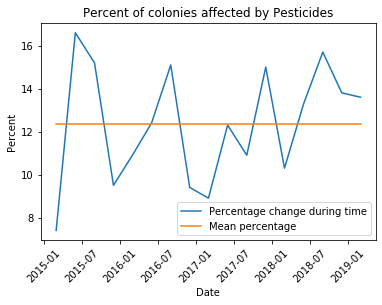

In [140]:
stressor = 'Pesticides'
state = disorder.loc[disorder.State == 'United States', ['Date', stressor]]
plt.plot(state.Date, state[stressor], label='Percentage change during time')
plt.plot(state.Date, [state[stressor].mean()] * len(state.Date), label='Mean percentage')
plt.xticks(rotation=45)
plt.title(f'Percent of colonies affected by {stressor}')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.legend();

Some of the known reasons for the colony losses are mites, parasites, pesticides and diseases. Using the disorder dataframe we can see how percentage of colonies affected by stressors. A colony can be affected by multiple stressors at the same time.

In [141]:
stressor = 'Parasites'

state_colonies = colonies.loc[colonies.State == 'United States', ['Date', 'Colonies', 'Lost', 'Percent lost', 'Added', 'Renovated', 'Percent renovated']]
state_colonies.set_index('Date', inplace=True)
state_disorder = disorder.loc[disorder.State == 'United States', :]
state_disorder.set_index('Date', inplace=True)

joined = state_colonies.join(state_disorder)
joined.drop('State', axis=1, inplace=True)

In [142]:
joined[stressor] = joined[stressor]/100 * state_colonies['Colonies']

In [143]:
joined

,Colonies,Lost,Percent lost,Added,Renovated,Percent renovated,Mites,Parasites,Diseases,Pesticides,Other,Unknown
Date,,,,,,,,,,,,
2015-03-01,2824610,500020,18,546980,270530,10,25.2,242916.46,3.1,7.4,6.9,4.3
2015-06-01,2849500,352860,12,661860,692850,24,43.4,555652.50,4.9,16.6,11.6,3.5
2015-09-01,3132880,457100,15,172990,303070,10,41.2,551386.88,8.0,15.2,8.8,4.8
2015-12-01,2874760,412380,14,117150,158790,6,37.0,327722.64,5.2,9.5,7.3,6.9
2016-03-01,2619940,416100,16,571880,245060,9,34.6,330112.44,6.2,10.9,6.9,5.4
2016-06-01,2801470,329820,12,736920,561160,20,53.4,456639.61,9.5,12.4,12.3,4.1
2016-09-01,3181180,397290,12,217320,282130,9,46.1,496264.08,6.7,15.1,9.3,4.5
2016-12-01,3032060,502350,17,124660,60390,2,46.6,512418.14,8.3,9.4,10.1,6.4
2017-03-01,2641090,398650,15,478240,241210,9,42.2,409368.95,7.0,8.9,7.2,7.4


In [144]:
joined.corr()

,Colonies,Lost,Percent lost,Added,Renovated,Percent renovated,Mites,Parasites,Diseases,Pesticides,Other,Unknown
Colonies,1.000000,0.296126,-0.145225,-0.622792,-0.212164,-0.284645,0.127624,0.486330,0.044562,0.330795,0.184993,-0.374215
Lost,0.296126,1.000000,0.892841,-0.542526,-0.813821,-0.811326,-0.369310,0.020160,-0.046437,-0.386627,-0.323616,0.139475
Percent lost,-0.145225,0.892841,1.000000,-0.262743,-0.735276,-0.702360,-0.431481,-0.208886,-0.069042,-0.540602,-0.430198,0.280592
Added,-0.622792,-0.542526,-0.262743,1.000000,0.722341,0.749643,-0.095166,-0.284277,-0.093081,-0.094215,0.129274,-0.107919
Renovated,-0.212164,-0.813821,-0.735276,0.722341,1.000000,0.995423,0.233747,0.026541,-0.018430,0.338479,0.464851,-0.175315
Percent renovated,-0.284645,-0.811326,-0.702360,0.749643,0.995423,1.000000,0.222198,-0.015763,-0.003806,0.293303,0.442094,-0.110617
Mites,0.127624,-0.369310,-0.431481,-0.095166,0.233747,0.222198,1.000000,0.716828,0.763967,0.602844,0.784287,0.314923
Parasites,0.486330,0.020160,-0.208886,-0.284277,0.026541,-0.015763,0.716828,1.000000,0.700750,0.679232,0.565554,0.109734
Diseases,0.044562,-0.046437,-0.069042,-0.093081,-0.018430,-0.003806,0.763967,0.700750,1.000000,0.366667,0.471846,0.494807
Pesticides,0.330795,-0.386627,-0.540602,-0.094215,0.338479,0.293303,0.602844,0.679232,0.366667,1.000000,0.520180,-0.228034


Why the fuck are colonies lost and number of colonies positively correlated? Probably because the number of added colonies is correlated to colonies lost. Join the rest of the dataframe and check! Updated in the cells above.

It actually makes sense. You can look at this correlations from another point of view. If you have more colonies, then you could lose more of them and that's why it's negatively correlated. Why are the stressors and colonies lost negatively correlated? Maybe you can look at this this way: you loose colonies because of those stuff and the more you loose affected colonies, the less affected colonies you will have and that's why all of those are negatively correlated. Because you loose more affected colonies and less not affected!

Maybe if I subtract the number of added and renovated colonies from the total number of colonies

In [ ]:
subtracted = joined.copy()
subtracted['Colonies'] = subtracted['Colonies'] - subtracted['Added'] - subtracted['Renovated']

In [ ]:
subtracted

In [ ]:
subtracted.corr()

This is even worse, number of colonies and colonies lost is almost 70% positively correlated

In [ ]:
plt.plot(subtracted[['Colonies', 'Lost']]);

This is weird. I'm sick of this dataset

# Government investments

In [128]:
import csv

def read_investments(path, index):
    data = []
    
    with open(path, encoding="utf8", errors='ignore') as input_file:
        reader = csv.reader(input_file)
        
        for cnt, row in enumerate(reader):
                
            if row[1] == 'd':
                data.append(row[2:])
    df = pd.DataFrame(data).T[:3]
    df.columns = df.iloc[0]
    df.drop(0, inplace=True)
    df.index = index
    return df.astype(int)

In [129]:
investments = pd.concat([read_investments('data/Honey/Hone-03-22-2017/hony_p06a_t017.csv', [2015, 2016]),
                        read_investments('data/Honey/hony0519/hony_p05a_t024.csv', [2017, 2018])])

investments

,Varroa control and treatment,Other colony issues 1/,Feed 2/,Foundation,Hives/woodenware
2015,16128,6371,50283,9461,11156
2016,16042,6647,50307,7294,9014
2017,17240,5919,53075,9775,9989
2018,17788,4825,65220,9534,13646


In [145]:
mask = colonies['Date'].map(lambda x: x.month) == 3
selected = colonies.loc[(mask) & (colonies.State == 'United States')].iloc[:-1]
selected.index = investments.index
selected

,State,Colonies,Maximum,Lost,Percent lost,Added,Renovated,Percent renovated,Date
2015,United States,2824610,0,500020,18,546980,270530,10,2015-03-01
2016,United States,2619940,0,416100,16,571880,245060,9,2016-03-01
2017,United States,2641090,0,398650,15,478240,241210,9,2017-03-01
2018,United States,2635220,0,438030,17,511320,289200,11,2018-03-01


In [146]:
joined = selected.join(investments)
joined.drop(['Date', 'State', 'Maximum'], axis=1, inplace=True)
joined

,Colonies,Lost,Percent lost,Added,Renovated,Percent renovated,Varroa control and treatment,Other colony issues 1/,Feed 2/,Foundation,Hives/woodenware
2015,2824610,500020,18,546980,270530,10,16128,6371,50283,9461,11156
2016,2619940,416100,16,571880,245060,9,16042,6647,50307,7294,9014
2017,2641090,398650,15,478240,241210,9,17240,5919,53075,9775,9989
2018,2635220,438030,17,511320,289200,11,17788,4825,65220,9534,13646


In [147]:
joined.corr()

,Colonies,Lost,Percent lost,Added,Renovated,Percent renovated,Varroa control and treatment,Other colony issues 1/,Feed 2/,Foundation,Hives/woodenware
Colonies,1.000000,0.920507,0.755619,0.235038,0.281206,0.195928,-0.455465,0.303598,-0.379028,0.343200,0.108225
Lost,0.920507,1.000000,0.951209,0.399752,0.573349,0.483713,-0.372978,0.113095,-0.120061,0.231103,0.350797
Percent lost,0.755619,0.951209,1.000000,0.458933,0.754971,0.674200,-0.239926,-0.075019,0.118515,0.144981,0.525367
Added,0.235038,0.399752,0.458933,1.000000,-0.000866,-0.099371,-0.802450,0.596983,-0.424003,-0.799026,-0.318263
Renovated,0.281206,0.573349,0.754971,-0.000866,1.000000,0.993034,0.428324,-0.702751,0.739212,0.399312,0.944113
Percent renovated,0.195928,0.483713,0.674200,-0.099371,0.993034,1.000000,0.531258,-0.781681,0.809626,0.446108,0.974546
Varroa control and treatment,-0.455465,-0.372978,-0.239926,-0.802450,0.428324,0.531258,1.000000,-0.940788,0.874174,0.624284,0.695943
Other colony issues 1/,0.303598,0.113095,-0.075019,0.596983,-0.702751,-0.781681,-0.940788,1.000000,-0.975141,-0.582300,-0.887224
Feed 2/,-0.379028,-0.120061,0.118515,-0.424003,0.739212,0.809626,0.874174,-0.975141,1.000000,0.397521,0.878783
Foundation,0.343200,0.231103,0.144981,-0.799026,0.399312,0.446108,0.624284,-0.582300,0.397521,1.000000,0.590578


# Fuck yea Europe

In [148]:
df2016 = pd.read_csv('data/Europe/T0001-10.1080_00218839.2016.1260240.csv')
df2016['Year'] = 2016
df2017 = pd.read_csv('data/Europe/T0001-10.1080_00218839.2018.1460911.csv')
df2017['Year'] = 2017

df2018 = pd.read_csv('data/Europe/t0001-10.1080_00218839.2019.1615661.csv')
df2018['Year'] = 2018

In [149]:
df2016.columns = df2016.columns.str.lower()
df2017.columns = df2017.columns.str.lower()
df2018.columns = df2018.columns.str.lower()

df2017 = df2017.loc[:, df2016.columns]
df2018 = df2018.loc[:, df2016.columns]

/Users/alencarin/opt/anaconda3/envs/ada/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [150]:
joined = df2016.append(df2017.append(df2018))
joined = joined.loc[~(joined.country.str.strip() == '')]
joined.replace('\(.*\)', '', regex=True, inplace=True)
joined.replace('\(.*', '', regex=True, inplace=True)
joined.replace(',', '', regex=True, inplace=True)
joined.replace('Overall.*', 'Overall', regex=True, inplace=True)
joined.replace('na', np.NaN, inplace=True)
joined['year'] = pd.to_datetime(joined['year'].astype(str))
joined.iloc[:,1:-3] = joined.iloc[:,1:-3].astype(float)

In [151]:
joined

,country,no. of respon-dents,no. of colonies going into winter,% mortality rate (95% ci),% rate of loss of colonies due to queen problems (95% ci),overall winter loss rate (95% ci),estimated % of beekeepers represented,effect of operation size,year
0,Austria,1289.0,23418.0,4.5,3.6,8.1,5,***M L < S,2016-01-01
1,Belgium,451.0,4064.0,6.9,5.2,12.2,5,Ns few in class M/L,2016-01-01
2,Czech Republic,968.0,17350.0,4.1,2.2,6.4,2,Ns few in class L,2016-01-01
3,Denmark,1186.0,12359.0,6.9,8.6,15.5,19,***L < S M,2016-01-01
4,Estonia,71.0,5115.0,11.2,4.3,15.5,1,**L < S,2016-01-01
...,...,...,...,...,...,...,...,...,...
62,Sweden,2260.0,19570.0,9.6,3.6,14.9,15,NaN,2018-01-01
64,Switzerland,1370.0,18807.0,7.9,5.2,13.8,8,NaN,2018-01-01
66,Ukraine,627.0,22621.0,6.7,2.1,11.3,<1,NaN,2018-01-01
68,Wales,34.0,214.0,13.1,10.7,26.6,2,NaN,2018-01-01


In [152]:
joined.corr()

,no. of respon-dents,no. of colonies going into winter,% mortality rate (95% ci),% rate of loss of colonies due to queen problems (95% ci),overall winter loss rate (95% ci)
no. of respon-dents,1.000000,0.964933,0.066607,-0.017901,0.024260
no. of colonies going into winter,0.964933,1.000000,0.043541,-0.033943,0.011666
% mortality rate (95% ci),0.066607,0.043541,1.000000,0.165977,0.815045
% rate of loss of colonies due to queen problems (95% ci),-0.017901,-0.033943,0.165977,1.000000,0.643850
overall winter loss rate (95% ci),0.024260,0.011666,0.815045,0.643850,1.000000


In [153]:
winter_loss = joined.loc[:, ['country', 'overall winter loss rate (95% ci)', 'year']]

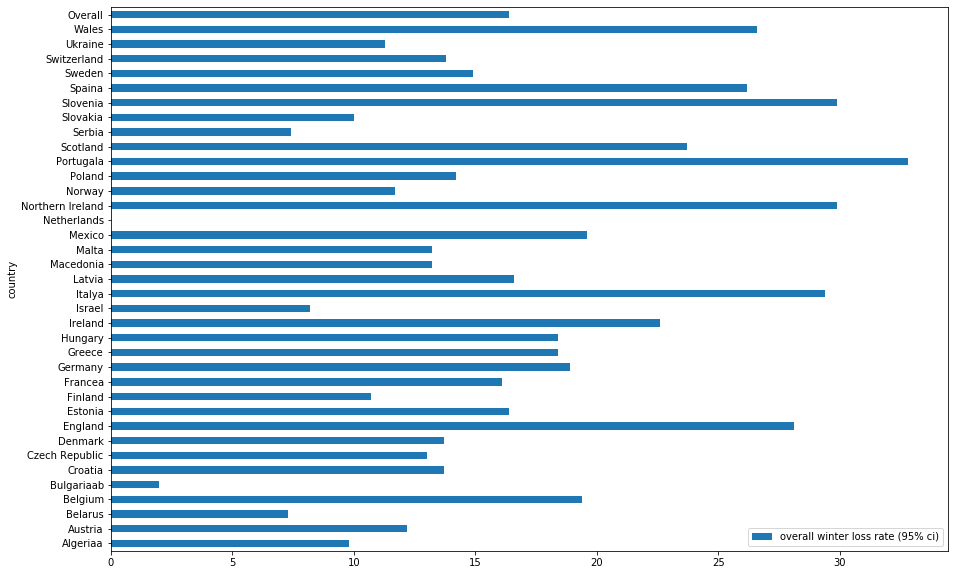

In [154]:
winter_loss.loc[winter_loss['year'] == '2018'].plot.barh(x='country', y='overall winter loss rate (95% ci)',
                                                        figsize=(15,10));
# plt.xticks(rotation=60);

In [155]:
def convert(data, mask, year):
    df = data.copy()
    df = df.loc[(df['year'] == year) & df['country'].isin(mask)].T
    df.columns = list(df.iloc[0])
    df.drop(df.index[0], inplace=True)
    df.drop(df.index[1], inplace=True)
    df.index = [year]
    return df

In [156]:
mask = list(set(list(winter_loss.loc[winter_loss['year'] == '2016', 'country'])) 
            & set(list(winter_loss.loc[winter_loss['year'] == '2017', 'country'])) 
            & set(list(winter_loss.loc[winter_loss['year'] == '2018', 'country'])))

In [157]:
len(mask)

22

This data is shit, only 22 countries in the intersection, out of 37 in 2018 data

In [158]:
countries16 = convert(winter_loss.loc[(winter_loss['year'] == '2016') & winter_loss['country'].isin(mask)], mask, '2016')
countries17 = convert(winter_loss.loc[(winter_loss['year'] == '2017') & winter_loss['country'].isin(mask)], mask, '2017')
countries18 = convert(winter_loss.loc[(winter_loss['year'] == '2018') & winter_loss['country'].isin(mask)], mask, '2018')

In [159]:
stack = pd.concat([countries16, countries17, countries18], sort=True)
stack

,Austria,Belgium,Croatia,Czech Republic,Denmark,Estonia,Finland,Ireland,Israel,Latvia,...,Norway,Overall,Poland,Scotland,Slovakia,Slovenia,Sweden,Switzerland,Ukraine,Wales
2016,8.1,12.2,16.4,6.4,15.5,15.5,15.4,29.5,10.5,15,...,12.1,12,11.3,18,8.2,14.2,15.9,9.9,9.9,22.4
2017,23.4,23.4,23.1,15,19.3,13.4,14.6,13.3,14.6,18.5,...,7.7,20.9,21.8,20.4,16.2,19.6,15.2,20.8,17.9,19.8
2018,12.2,19.4,13.7,13,13.7,16.4,10.7,22.6,8.2,16.6,...,11.7,16.4,14.2,23.7,10,29.9,14.9,13.8,11.3,26.6


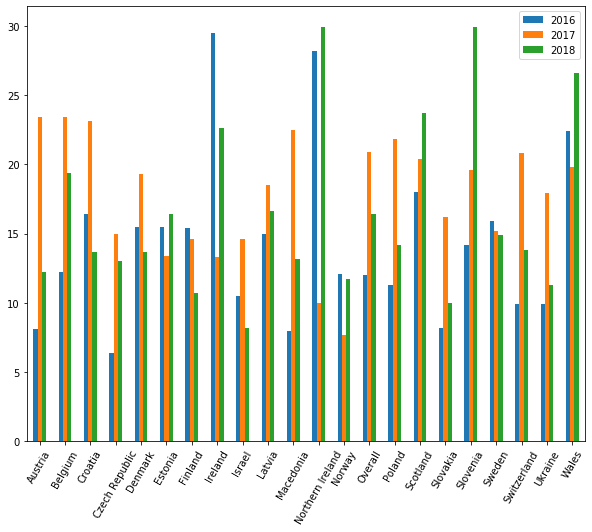

In [160]:
stack.T.plot.bar(figsize=(10, 8), rot=60);

We can see that this is just a mess and we cannot find any meaningful global trends.

# Crops and beehives
The bees are the most important insects in the pollination process and we read that the pollination market is much bigger than the honey market. We will try to find some correlations between the yield of crop production and the number of beehives.

In [61]:
livestock = pd.read_csv('data/Production_Livestock_E_All_Data_(Normalized).csv', encoding='iso-8859-1')
beehives = livestock.loc[livestock['Item'] == 'Beehives', ['Area', 'Value', 'Year']]
beehives.columns = ['Area', 'Beehives', 'Year']
beehives.reset_index(drop=True, inplace=True)
beehives.head()

,Area,Beehives,Year
0,Albania,95100.0,1961
1,Albania,92800.0,1962
2,Albania,83500.0,1963
3,Albania,96500.0,1964
4,Albania,109800.0,1965


In [66]:
crops = pd.read_csv('data/FAOSTAT/Production_Crops_E_All_Data_(Normalized).csv', encoding='iso-8859-1')
crops = crops.loc[(crops['Element'] == 'Yield'), ['Area', 'Item', 'Year', 'Value']]
crops.reset_index(drop=True, inplace=True)
crops.sort_values(inplace=True, by=['Area', 'Item', 'Year'])
crops.columns = ['Area', 'Item', 'Year', 'Tonnes']
crops.head()

,Area,Item,Year,Tonnes
0,Afghanistan,"Almonds, with shell",1976,16610.0
1,Afghanistan,"Almonds, with shell",1977,15000.0
2,Afghanistan,"Almonds, with shell",1978,20000.0
3,Afghanistan,"Almonds, with shell",1979,17500.0
4,Afghanistan,"Almonds, with shell",1980,17069.0


In [67]:
joined = crops.merge(beehives, on=['Area', 'Year'])
joined

,Area,Item,Year,Tonnes,Beehives
0,Africa,"Almonds, with shell",1961,2279.0,6845050.0
1,Africa,"Anise, badian, fennel, coriander",1961,9470.0,6845050.0
2,Africa,Apples,1961,70028.0,6845050.0
3,Africa,Apricots,1961,28790.0,6845050.0
4,Africa,Artichokes,1961,62154.0,6845050.0
...,...,...,...,...,...
578116,Zambia,"Tobacco, unmanufactured",2017,17927.0,60357.0
578117,Zambia,Tomatoes,2017,97655.0,60357.0
578118,Zambia,Vegetables Primary,2017,80649.0,60357.0
578119,Zambia,"Vegetables, fresh nes",2017,76356.0,60357.0


In [87]:
run_this_cell = False

if run_this_cell:
    
    crops_unique = crops['Item'].unique()
    countries_unique = crops['Area'].unique()

    countries_list = []
    crops_list = []
    corrs = []

    for country in countries_unique:
        for crop in crops_unique:

            corr = joined.loc[(joined['Area'] == country) & (joined['Item'] == crop), 
                              ['Tonnes', 'Beehives']].corr().iloc[0, 1]

            countries_list.append(country)
            crops_list.append(crop)
            corrs.append(corr)

    correlations = pd.DataFrame({'country': countries_list, 'crop': crops_list, 'correlation': corrs})
    correlations.to_pickle('crops_correlations')

In [169]:
correlations = pd.read_pickle('crops_correlations')

We read that one of the crops for which the bees are very important are almonds, that's why we will look into correlations between almonds production per area and number of beehives for all the continents and the World.

In [170]:
correlations.loc[(correlations['Crop'] == 'Almonds, with shell')]

,Area,Crop,Correlation
172,Africa,"Almonds, with shell",0.876024
516,Algeria,"Almonds, with shell",0.831269
860,Americas,"Almonds, with shell",0.562135
1376,Argentina,"Almonds, with shell",0.398638
1720,Asia,"Almonds, with shell",-0.002661
...,...,...,...
42656,Western Asia,"Almonds, with shell",0.470283
42828,Western Europe,"Almonds, with shell",0.805834
43172,World,"Almonds, with shell",0.783777
43344,Yemen,"Almonds, with shell",0.188454


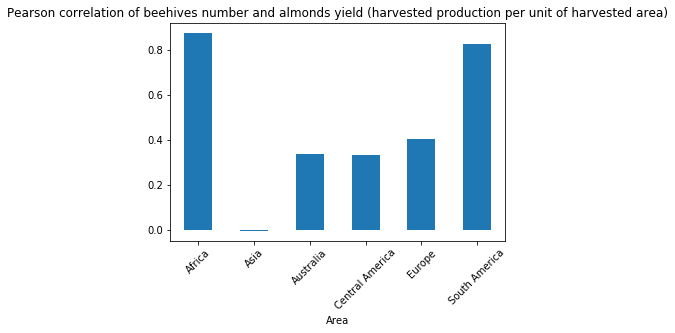

In [173]:
continents = ['Africa', 'Europe', 'Asia', 'Central America', 'South America', 'Australia']

cont_corr = correlations.loc[(correlations['Crop'] == 'Almonds, with shell') 
                 & (correlations['Area'].isin(continents)), ['Area', 'Correlation']]

cont_corr.plot.bar(x='Area', y='Correlation', legend=False, rot=45);
plt.title('Pearson correlation of beehives number and almonds yield (harvested production per unit of harvested area)');

We can see that there are some very big correlations between those. It would make sense to this for other crops as well.

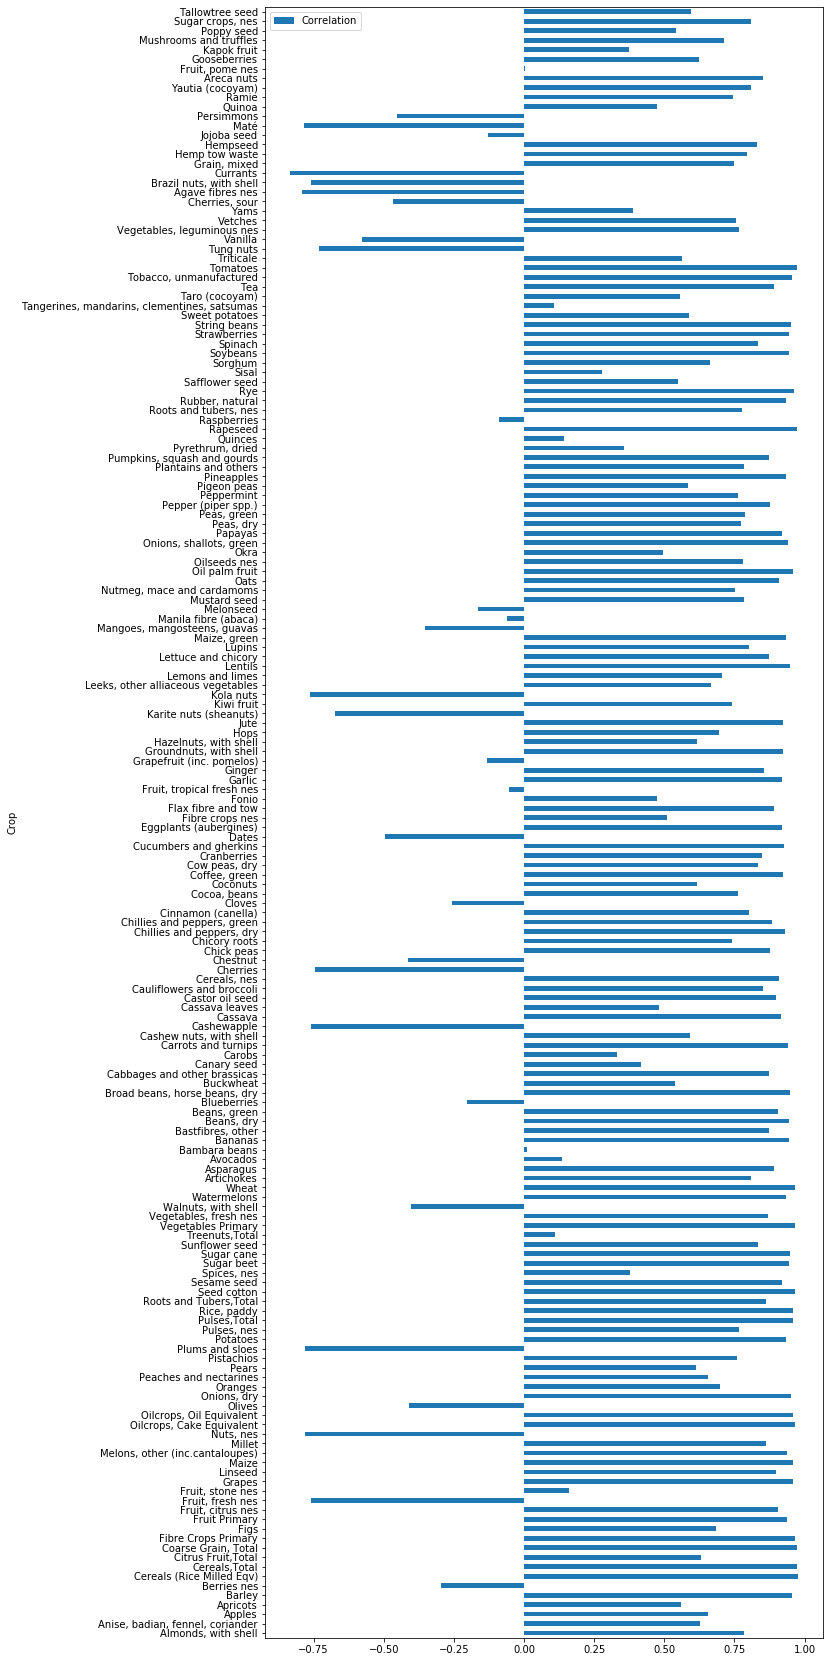

In [184]:
correlations.loc[(correlations['Area'] == 'World')].plot.barh(x='Crop', y='Correlation', figsize=(10, 30));

In [ ]:
plt.plot()